# Team DatenWelle

## Exploratory data analysis

This notebook loads the data from JSON format and performs some initial clean-up and visualisation tasks

In [135]:
#!git pull
#!git status
#!git add 2-anya-keywords_RapidFuzz.ipynb  #1-anya_exploratory_analysis.ipynb  2-anya-keywords_FuzzyWuzzy.ipynb 2-anya-keywords_RapidFuzz.ipynb 2-anya_fuzzyWuzzy_90.py 2-anya_keyword_FuzzyCouple.ipynb 2-anya_rapidfuzz_70.py
#!git commit -m 'added '
#!git commit -a
#!git push
#!pip install -r ../requirements.txt

#after installed new libraries
#!pip freeze > requirements.txt
#!git add requirements.txt 
#!git add out_dedupl_100323.csv test.csv
#!git commit -m 'added output files f fuzzy wuzzy dedupe'
#!git commit -m 'added library rapidfuzzy'
#!git push 

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../data/interim/out_dedupl_10k_kw_only_140323_threshold_90.csv

nothing added to commit but untracked files present (use "git add" to track)


In [4]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Opening JSON file
f = open('../data/raw/CMS_2010_to_June_2022_ENGLISH.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

df = pd.DataFrame.from_dict(data)

#print(df.head())

In [6]:
df_copy= df.copy()
#general info on the data
#df.info()


In [7]:
df.isnull().sum()


id                            0
name                          0
shortTitle                    0
text                          0
teaser                        0
shortTeaser                   0
kicker                   105569
regions                       0
keywords                      0
keywordStrings                0
thematicFocusCategory     95746
navigations                   0
categories                    0
departments                   0
firstPublicationDate     133589
lastModifiedDate              0
contentDate                   0
relatedAutoTopics             0
contentLinks                  0
articles                      0
isOpinion                     0
geographicLocations       25294
contentAssociations           0
mainContentImageLink       5295
images                        0
externalLinks                 0
topStory                      0
language                 150365
dtype: int64

In [8]:
#sns.countplot(y=df.isnull().sum(),data=df)

#### Finding the subset of the data for 1 Jan 2019 - 1 Jan 2020 based on lastModifiedDate

In [9]:
df = df.sort_values(by='lastModifiedDate') #sort dataframe

datetimes = pd.to_datetime(df['lastModifiedDate'])
df['ts_lastModifiedDate']=datetimes
#df.iloc[ts_start]['ts_lastModifiedDate']


#find start index for subset 2019-2022
ts_start=datetimes[(datetimes > pd.Timestamp(year=2019, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2019, month=1, day=2).tz_localize('utc'))].min()
print(ts_start)
#find end date for subset 2019-2022
ts_end=datetimes[(datetimes > pd.Timestamp(year=2022, month=1, day=1).tz_localize('utc')) 
          & (datetimes < pd.Timestamp(year=2022, month=1, day=2).tz_localize('utc'))].min()
print(ts_end)

start_date=datetimes[datetimes == ts_start]
end_date=datetimes[datetimes == ts_end]

#find index for the chosen start and end dates
start_index=start_date.index[0]
print(start_index)
df[df.index == start_date.index[0]]

end_index=end_date.index[0]
print(end_index)
df[df.index == end_date.index[0]]

df_subset=df[start_index:end_index]


2019-01-01 03:57:28.904000+00:00
2022-01-01 02:35:51.098000+00:00
60278
150367


In [10]:
#start id
print('start id is '+str( df.iloc[int(start_index)]['id'] )+'\n' )

#print(end_date)
print('end id is '+str(df.iloc[int(end_index)]['id'])+'\n') #60305852

start id is 46912921

end id is 60306089



In [11]:
df_subset=df[start_index:end_index]

## Exploring Focus Categories column

In [12]:

#df['thematicFocusCategory'].astype(str).unique()
#Exporting dictionary into the array of 'clean' focus categories
focus_clean = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)
focus_clean.unique()

array([None, 'History', 'Business', 'Conflicts', 'Politics', 'Culture',
       'Society', 'Education', 'Digital World', 'Sports', 'Crime',
       'Lifestyle', 'Religion', 'Human Rights', 'Science', 'Music',
       'Law and Justice', 'Terrorism', 'Nature and Environment', 'Film',
       'Travel', 'Media', 'Technology', 'Soccer', 'Learning German',
       'Catastrophe', 'Cars and Transportation', 'Health', 'Literature',
       'Arts', 'Architecture', 'Dance', 'Design', 'Theater', 'Migration',
       'Freedom of Speech', 'Trade', 'Rule of Law', 'Press Freedom',
       'Offbeat', 'Equality', 'Climate', 'Corruption', 'Diversity',
       'Innovation', 'Globalization', 'Food Security'], dtype=object)

In [13]:
# Amount of articles per FocusCategory
focus_clean.value_counts()

Politics                   24923
Sports                      6546
Business                    6295
Culture                     5699
Society                     4809
Conflicts                   4568
Nature and Environment      4260
Crime                       3548
Health                      2781
Law and Justice             1783
Catastrophe                 1740
Media                       1740
Science                     1499
Travel                      1416
Human Rights                1254
Music                        846
Terrorism                    829
History                      659
Religion                     619
Technology                   515
Film                         414
Soccer                       405
Education                    384
Cars and Transportation      352
Lifestyle                    335
Arts                         321
Literature                   244
Migration                    223
Press Freedom                219
Digital World                119
Rule of La

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, 'History'),
  Text(0, 1, 'Business'),
  Text(0, 2, 'Conflicts'),
  Text(0, 3, 'Politics'),
  Text(0, 4, 'Culture'),
  Text(0, 5, 'Society'),
  Text(0, 6, 'Education'),
  Text(0, 7, 'Digital World'),
  Text(0, 8, 'Sports'),
  Text(0, 9, 'Crime'),
  Text(0, 10, 'Lifestyle'),
  Text(0, 11, 'Religion'),
  Text(0, 12, 'Human Rights'),
  Text(0, 13, 'Science'),
  Text(0, 14, 'Music'),
  Text(0, 15, 'Law and Justice'),
  Text(0, 16, 'Terrorism'),
  Text(0, 17, 'Nature and Environment'),
  Text(0, 18, 'Film'),
  Text(0, 19, 'Travel'),
  Text(0, 20, 'Media'),
  Text(0, 21, 'Technology'),
  Text(0, 22, 'Soccer'),
  Text(0, 23, 'Learning German'),
  Text(0, 24, 'Catastrophe'),
  Text(0, 25, 'Cars and Transportation'),
  Text(0, 26, 'Health'),
  Text(0, 27, 'Literature'),
  Text

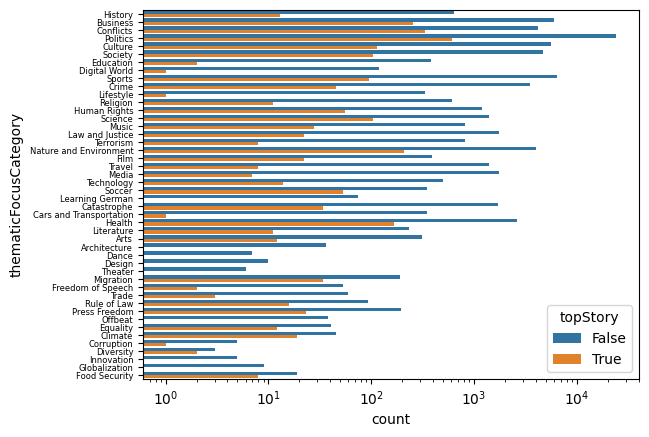

In [14]:
#Plotting amount of TopStories across FocusCategories
sns.countplot(y=focus_clean, hue='topStory', data=df)
plt.xscale('log')
plt.yticks(fontsize=6)#, rotation=90)

### Keywords exploration

In [15]:
df['keywords'] # is keywords in dictionary

0         [{'name': 'DRC'}, {'name': 'M23'}, {'name': 'F...
1         [{'name': 'telephone'}, {'name': 'hotline'}, {...
2         [{'name': 'fiscal cliff'}, {'name': 'Obama'}, ...
3         [{'name': 'Kim Jong Un'}, {'name': 'Kim Jong I...
4         [{'name': 'fiscal cliff'}, {'name': 'US Senate...
                                ...                        
175654    [{'name': 'Turkey'}, {'name': 'Recep Tayipp Er...
175655    [{'name': 'pollution'}, {'name': 'gold mine'},...
175656    [{'name': 'war'}, {'name': 'Ukraine'}, {'name'...
175657    [{'name': 'France'}, {'name': 'vegetarian'}, {...
175658          [{'name': 'Ecuador'}, {'name': 'protests'}]
Name: keywords, Length: 175659, dtype: object

In [16]:
df['keywords'].isna().sum()


0

In [17]:
# def get_keywords(row):
#     if row is None:
#         return None
#     else:
#         res_list = []
#         for name_dict in row:
#             res_list.append(name_dict['name'])
#         return res_list

# lists_kw=df['keywords'].apply(get_keywords)

In [18]:
list(df['keywordStrings'].values)
lists_kw[:10]

[['DRC', 'M23', 'FDLR', 'Rwanda', 'Susan Rice', 'UN security council'],
 ['telephone',
  'hotline',
  'helpline',
  'Catholic Church',
  'federal government',
  'abuse',
  'sexual violence'],
 ['fiscal cliff',
  'Obama',
  'congress',
  'spending cuts',
  'senate',
  'debt ceiling'],
 ['Kim Jong Un',
  'Kim Jong Il',
  'Kim Il Sung',
  'lee myung-bak',
  'park Guen-hye',
  'north korea',
  'south korea',
  'pyongyang',
  'Seoul'],
 ['fiscal cliff',
  'US Senate',
  'Senate vote',
  'fiscal cliff bill',
  'recession'],
 ['ireland', 'european union', 'cyprus', 'enda kenny', 'cyprus'],
 ['pakistan', 'taliban', 'aid workers'],
 ['New Year',
  'celebrations',
  'Australia',
  'fireworks',
  'Kylie Minogue',
  'Scotland',
  'Burma',
  'Hong Kong',
  'Christmas Island'],
 ['Myanmar',
  'Burma',
  'tourism',
  'sustainable tourism',
  'trips to Asia',
  'travelling in Asia',
  'travels',
  'vacation',
  'German tourists'],
 ['China', 'Wen Jiabao', 'New York Times', 'journalist', 'Australia'],


In [20]:
import functools
import operator
functools.reduce(operator.add, lists_kw[:10])

['DRC',
 'M23',
 'FDLR',
 'Rwanda',
 'Susan Rice',
 'UN security council',
 'telephone',
 'hotline',
 'helpline',
 'Catholic Church',
 'federal government',
 'abuse',
 'sexual violence',
 'fiscal cliff',
 'Obama',
 'congress',
 'spending cuts',
 'senate',
 'debt ceiling',
 'Kim Jong Un',
 'Kim Jong Il',
 'Kim Il Sung',
 'lee myung-bak',
 'park Guen-hye',
 'north korea',
 'south korea',
 'pyongyang',
 'Seoul',
 'fiscal cliff',
 'US Senate',
 'Senate vote',
 'fiscal cliff bill',
 'recession',
 'ireland',
 'european union',
 'cyprus',
 'enda kenny',
 'cyprus',
 'pakistan',
 'taliban',
 'aid workers',
 'New Year',
 'celebrations',
 'Australia',
 'fireworks',
 'Kylie Minogue',
 'Scotland',
 'Burma',
 'Hong Kong',
 'Christmas Island',
 'Myanmar',
 'Burma',
 'tourism',
 'sustainable tourism',
 'trips to Asia',
 'travelling in Asia',
 'travels',
 'vacation',
 'German tourists',
 'China',
 'Wen Jiabao',
 'New York Times',
 'journalist',
 'Australia']

In [22]:
#create series of sets
def get_keywords(row):
    if row is None:
        return None
    else:
        res_set = set()
        for name_dict in row:
            res_set.add(name_dict['name'])
        return res_set

df['keywords'].apply(get_keywords)

0         {Rwanda, Susan Rice, UN security council, FDLR...
1         {Catholic Church, hotline, telephone, sexual v...
2         {spending cuts, debt ceiling, Obama, fiscal cl...
3         {Kim Il Sung, Kim Jong Il, Kim Jong Un, north ...
4         {US Senate, fiscal cliff bill, fiscal cliff, r...
                                ...                        
175654    {Finland Sweden, NATO, Turkey, Recep Tayipp Er...
175655     {pollution, Anagold, cyanide, Turkey, gold mine}
175656    {conscription, mobilization, conscript, Russia...
175657                 {sausage, steak, vegetarian, France}
175658                                  {Ecuador, protests}
Name: keywords, Length: 175659, dtype: object

In [23]:
sets=df['keywords'].apply(get_keywords)

In [24]:
sets[0:10]

0    {Rwanda, Susan Rice, UN security council, FDLR...
1    {Catholic Church, hotline, telephone, sexual v...
2    {spending cuts, debt ceiling, Obama, fiscal cl...
3    {Kim Il Sung, Kim Jong Il, Kim Jong Un, north ...
4    {US Senate, fiscal cliff bill, fiscal cliff, r...
5        {cyprus, ireland, european union, enda kenny}
6                     {pakistan, aid workers, taliban}
7    {fireworks, Kylie Minogue, Burma, Scotland, Ch...
8    {Burma, vacation, tourism, sustainable tourism...
9    {China, journalist, New York Times, Wen Jiabao...
Name: keywords, dtype: object

In [25]:
sets=df['keywords'].apply(get_keywords)
sets=sets[0:10000]
# should work but it is very slow for now with current gpus
kw=functools.reduce(set.union, sets)


In [26]:
print(len(kw))
print(len(df_subset))

24594
90090


In [27]:
#sets=df_subset['keywords'].apply(get_keywords)
sets=sets[0:10000]
from tqdm import tqdm
def get_unique_keywords(sets):
    result_set = set()
    for row_set in tqdm(sets.values):
        #result_set.union(row_set)
        result_set = result_set.union(row_set)
    return result_set

unique_keywords = get_unique_keywords(sets)



100%|██████████| 10000/10000 [00:06<00:00, 1510.63it/s]


In [86]:
sets_10000=sets

In [37]:
print(len(unique_keywords))
print(type(unique_keywords))
#print(type(unique_keywords))
#print(unique_keywords)
#kw_string=str(unique_keywords)
#ind_kw_string=kw_string.split()
#print(len(ind_kw_string))
#set(str(unique_keywords).lower())

24594
<class 'set'>
<class 'set'>


In [39]:
unique_keywords

{'daniel bieler',
 'eads astrium',
 'Chosen Soren',
 'ABBA',
 'DJV',
 'Sven Kramer',
 'Afghan',
 'Deals',
 'arms',
 'human rights journalism',
 'Heinrich Himmler',
 'westbam',
 'economic behavior',
 'funny',
 'goethe institut',
 'child porn',
 'Nivea',
 'cured meats',
 'Press freedom',
 'financial crises',
 'manager',
 'Transformationsindex',
 'the serpent’s egg',
 'Luxembourg',
 'Home of all Thatched Huts in Smart Fancing',
 'phil shiner',
 'electoin',
 'smartphone addiction',
 'recapitalization scheme',
 'erdogan',
 'planes',
 'Free Democrats',
 'Konrad Adam',
 'Barbie',
 'poker',
 'hearing',
 'Obermair',
 'Saxony',
 'borkum',
 'Alkhatib',
 'Zarka',
 'Europeans',
 'felix loch',
 'National gun register',
 'Chornovol',
 'Tanztheater',
 'life span',
 'talent',
 'clawback',
 'Guests',
 'Maryland',
 'Ibrahim Shamsudeen',
 'The Giving Pledge',
 'SP1332',
 'Bethlehem',
 'voter fraud malaysia',
 'Pope',
 'Zen meditation',
 'double division',
 'German political foundations',
 'Nuclear deal',


### Playing with FuzzyWuzzy

In [31]:
# #function from tutorial to get simplest matching ratio
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process
# Str1 = "Apple Inc."
# Str2 = "apple Inc"
# Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
# print(Ratio)

95


In [61]:
from fuzzywuzzy.process import dedupe

In [52]:
help(process)

Help on module fuzzywuzzy.process in fuzzywuzzy:

NAME
    fuzzywuzzy.process - # encoding: utf-8

FUNCTIONS
    dedupe(contains_dupes, threshold=70, scorer=<function token_set_ratio at 0x7fee70f50440>)
        This convenience function takes a list of strings containing duplicates and uses fuzzy matching to identify
        and remove duplicates. Specifically, it uses the process.extract to identify duplicates that
        score greater than a user defined threshold. Then, it looks for the longest item in the duplicate list
        since we assume this item contains the most entity information and returns that. It breaks string
        length ties on an alphabetical sort.
        
        Note: as the threshold DECREASES the number of duplicates that are found INCREASES. This means that the
            returned deduplicated list will likely be shorter. Raise the threshold for fuzzy_dedupe to be less
            sensitive.
        
        Args:
            contains_dupes: A list of st

In [65]:
#fuzzy.process.dedupe function returns a list without duplicates. by default it is using 70% similarity ratio
#to explore similarity ratio for individual words use fuzzy.process.extract i.e. process.extract('angela merkel',unique_keywords,limit=20)
print(len(unique_keywords))
ded_kw=dedupe(unique_keywords)
print(len(ded_kw))

24594


11911


In [71]:
(ded_kw)

dict_keys(['daniel bieler', 'EADS Astrium', 'Chosen Soren', 'Gabbana', 'DJV', 'Kramer Bundesliga', 'Afghan presidential elections', 'arms deals', 'UN Arms Trade Treaty talks', 'UN Human Rights Council', 'Heinrich Himmler', 'jwestbam', 'consumer behaviour', 'funny', 'Partnerlogos Goethe Institut', 'Child pornography', 'Nivea', 'cured meats', 'World Press Freedom Index', 'Making Markets Work for the Poor: Microfinance - Offering Responsible Financial Services for the Poor', 'shift ranking manager bezahlung', 'Transformationsindex', 'the serpent’s egg', 'luxembourg meeting', 'Home of all Thatched Huts in Smart Fancing', 'isle signer', 'Iran elections', 'smartphone competition', 'banking sector recapitalization', 'Prime Minister Recep Tayyip Erdogan', 'long-haul planes', 'Christian Democrats', 'Konrad Adenauer Foundation', 'Barbie Dreamhouse', 'worker', 'Vatican UN hearing child abuse', 'Obermair', 'Saxony Anhalt', 'Borkum', 'Moaz al-Khatib', 'azarenka', 'Europeans fighting in Syria', 'Fel

In [72]:
#wrte the deduplicated keywords into the file
#pd.Series(list(ded_kw)).to_csv('./out_dedupl_10k_articles_only_100323.csv')
#pd.read_csv(path)

In [46]:
process.extract('angela merkel',unique_keywords,limit=20)

[('Angela Merkel', 100),
 ('angela merkel', 100),
 ('Angela merkel', 100),
 ('Angeka Merkel', 92),
 ('angela merkal', 92),
 ('Merke', 90),
 ('Merkel', 90),
 ('La', 90),
 ('Chancellor Angela Merkel', 90),
 ('Angela Merkel Ali Larayedh', 90),
 ('chancellor angela merkel', 90),
 ('merkel', 90),
 ('merkel in st petersburg', 86),
 ('Kehl', 77),
 ('Angola', 75),
 ('Chancellor Merkel', 73),
 ('Engel', 72),
 ('blame', 72),
 ('anger', 72),
 ('merkel cabinet', 70)]

In [88]:
# #example from the fuzzywuzzy tooturial on token ratio
# Str1 = "The supreme court case of Nixon vs The United States"
# Str2 = "Nixon v. United States"
# Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
# Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())
# Token_Sort_Ratio = fuzz.token_sort_ratio(Str1,Str2)
# Token_Set_Ratio = fuzz.token_set_ratio(Str1,Str2)
# print(Ratio)
# print(Partial_Ratio)
# print(Token_Sort_Ratio)
# print(Token_Set_Ratio)

57
77
58
95


In [35]:
keywords=df['keywordStrings'] # is keywords in strings
keywords

0         [DRC, M23, FDLR, Rwanda, Susan Rice, UN securi...
1         [telephone, hotline, helpline, Catholic Church...
2         [fiscal cliff, Obama, congress, spending cuts,...
3         [Kim Jong Un, Kim Jong Il, Kim Il Sung, lee my...
4         [fiscal cliff, US Senate, Senate vote, fiscal ...
                                ...                        
175654    [Turkey, Recep Tayipp Erdogan, Finland Sweden,...
175655     [pollution, gold mine, Turkey, Anagold, cyanide]
175656    [war, Ukraine, Russia, Russian attack, soldier...
175657                 [France, vegetarian, steak, sausage]
175658                                  [Ecuador, protests]
Name: keywordStrings, Length: 175659, dtype: object

In [36]:
keywords.isna().sum()

0